link of data used: [kaggle loan approval prediction dataset](https://www.kaggle.com/datasets/sonalisingh1411/loan-approval-prediction)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# load dataset

In [3]:
datapath = '/content/drive/MyDrive/ml_code/classification models/titanic survival prediction/train.csv'
datapath2 = '/content/drive/MyDrive/ml_code/classification models/titanic survival prediction/test.csv'

df = pd.read_csv(datapath)
df_test = pd.read_csv(datapath2)

target_variable = df["Survived"]

# **understanding data**

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [7]:
df.drop(columns = ["Name", "Ticket"], inplace=True)
df_test.drop(columns = ["Name", "Ticket"], inplace=True)

# handeling missing data

###finding amount of missing data in each column

In [8]:
max_non_null_val = df["PassengerId"].count()
print("Percentage of missing values in each column:\n")
missing_percent = []
for col in df.columns:
  missing_percent.append(df[col].isnull().sum()/max_non_null_val*100)
  print(f"{col} : {df[col].isnull().sum()/max_non_null_val*100:.2f}%")

Percentage of missing values in each column:

PassengerId : 0.00%
Survived : 0.00%
Pclass : 0.00%
Sex : 0.00%
Age : 19.87%
SibSp : 0.00%
Parch : 0.00%
Fare : 0.00%
Cabin : 77.10%
Embarked : 0.22%


###dropping columns with more than 40% missing values


In [9]:
from operator import indexOf
index_list =[]
for i in missing_percent:
  if(i>40):
    index_list.append(indexOf(missing_percent,i))
df_test.drop(df.columns[index_list],axis=1,inplace=True)
df.drop(df.columns[index_list],axis=1,inplace=True)
print(df.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp

###classifying columns based on numerical or categorical data

In [10]:
def classify_cols(df , cat_thresh = 15, card_thresh  = 20 ):
  cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
  num_but_cat_cols = [col for col in df.columns if df[col].dtypes != "O" and df[col].nunique()<cat_thresh]
  cat_but_card_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique()>card_thresh]
  # cat_cols = cat_cols + num_but_cat_cols
  cat_cols = [col for col in cat_cols if col not in cat_but_card_cols]
  num_cols = [col for col in df.columns if df[col].dtypes != "O" and col not in num_but_cat_cols]
  return cat_cols, num_cols, cat_but_card_cols,num_but_cat_cols

cat_cols, num_cols, cat_but_card_cols, num_but_cat_cols = classify_cols(df)
print(f"cat_cols: {(cat_cols)}")
print(f"num_cols: {(num_cols)}")
print(f"cat_but_car: {(cat_but_card_cols)}")
print(f"num_but_cat_cols: {(num_but_cat_cols)}")

cat_cols: ['Sex', 'Embarked']
num_cols: ['PassengerId', 'Age', 'Fare']
cat_but_car: []
num_but_cat_cols: ['Survived', 'Pclass', 'SibSp', 'Parch']


###Filling missing values in numerical columns with the mean value

In [11]:
for col in num_cols:
  df[col] = df[col].fillna(df[col].mean())
  if(col != "Survived"):
    df_test[col] = df_test[col].fillna(df[col].mean())
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp     

###Filling missing values in categorical columns with mode value

In [12]:
for col in cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])
  if(col != "Survived"):
    df_test[col] = df_test[col].fillna(df[col].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [13]:
for col in num_but_cat_cols:
  df[col] = df[col].fillna(df[col].mode()[0])
  if(col != "Survived"):
    df_test[col] = df_test[col].fillna(df[col].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [14]:
for col in cat_but_card_cols:
  df[col] = df[col].fillna(df[col].mode()[0])
  df_test[col] = df_test[col].fillna(df[col].mode()[0])
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp     

# Descriptive stats


In [15]:
stats = df.describe()
print(stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# encoding categorical data

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

columns_to_encode = cat_cols
columns_to_encode = [col for col in columns_to_encode if col not in cat_but_card_cols and col != "Survived"]

encoder = OneHotEncoder(sparse_output=False, drop="first")
encoder = encoder.fit(df[columns_to_encode])

encoded_categorical_data = encoder.transform(df[columns_to_encode])
encoded_categorical_data_test = encoder.transform(df_test[columns_to_encode])

encoded_categorical_df = pd.DataFrame(encoded_categorical_data,
                                      columns=encoder.get_feature_names_out(columns_to_encode))
encoded_categorical_df_test = pd.DataFrame(encoded_categorical_data_test,
                                      columns=encoder.get_feature_names_out(columns_to_encode))

encoded_categorical_df.index = df.index
encoded_categorical_df_test.index = df_test.index


df.drop(columns=columns_to_encode, inplace=True)
df_test.drop(columns=columns_to_encode , inplace =True)

df = pd.concat([df, encoded_categorical_df], axis=1)
df_test = pd.concat([df_test,encoded_categorical_df_test], axis = 1)

salesPrice = df["Survived"]
df.drop(columns=["Survived"], inplace=True)
df = pd.concat([df, salesPrice], axis=1)

print(df.info(10))
print(df_test.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_male     891 non-null    float64
 7   Embarked_Q   891 non-null    float64
 8   Embarked_S   891 non-null    float64
 9   Survived     891 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 69.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418

#correlation matrix of dataframe after encoding


In [17]:
df.drop(columns = cat_but_card_cols, inplace=True)
df_test.drop(columns = cat_but_card_cols, inplace = True)

In [18]:
df_corr = df.corr()
df_corr

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Survived
PassengerId,1.000000,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,-0.033606,0.022204,-0.005007
Pclass,-0.035144,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,0.221009,0.074053,-0.338481
Age,0.033207,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,-0.013855,-0.019336,-0.069809
SibSp,-0.057527,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,-0.026354,0.068734,-0.035322
Parch,-0.001652,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,-0.081228,0.060814,0.081629
Fare,0.012658,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,-0.117216,-0.162184,0.257307
Sex_male,0.042939,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,-0.074115,0.119224,-0.543351
Embarked_Q,-0.033606,0.221009,-0.013855,-0.026354,-0.081228,-0.117216,-0.074115,1.000000,-0.499421,0.003650
Embarked_S,0.022204,0.074053,-0.019336,0.068734,0.060814,-0.162184,0.119224,-0.499421,1.000000,-0.149683
Survived,-0.005007,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,0.003650,-0.149683,1.000000


<Axes: >

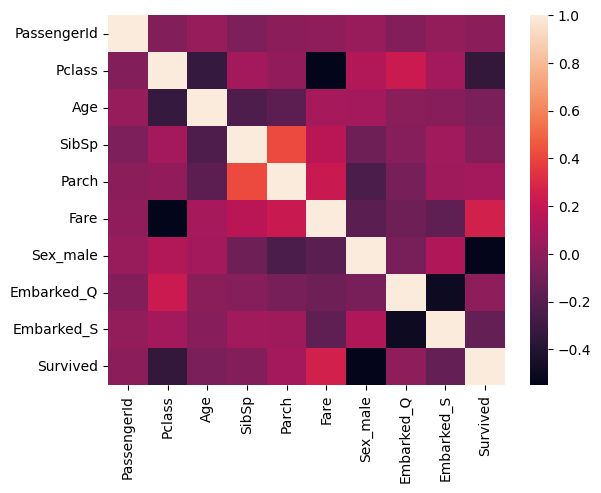

In [19]:
sns.heatmap(df_corr)

# dropping columns with less than 1% correlation

In [20]:
corr_coef_with_target_value = df_corr["Survived"].values
indexes_with_lessthan_1_corr = []
for i in corr_coef_with_target_value:
  if (abs(i)<0.01):
    indexes_with_lessthan_1_corr.append(indexOf(corr_coef_with_target_value,i))
df.drop(df.columns[indexes_with_lessthan_1_corr], axis=1,inplace=True)
df_test.drop(df_test.columns[indexes_with_lessthan_1_corr], axis =1, inplace = True)
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_S  891 non-null    float64
 7   Survived    891 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 55.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_male    418 non-null    float64
 6 

# Splitting training data into training and testing datasets

In [21]:
y = df['Survived']
df_X = df.drop(columns=['Survived'])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size = 0.25, random_state = 0)


#Data scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

df_test = sc.transform(df_test)

In [24]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# df_test = scaler.transform(df_test)


In [25]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df_test = scaler.transform(df_test)


#Trainnig Logistic regression model



In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[116  23]
 [ 23  61]]


0.7937219730941704

###Testing model for overfitting

In [28]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[356  54]
 [ 78 180]]


0.8023952095808383

###Grid search






In [29]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 300]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 80.40 %
Best Parameters: {'C': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


###building model with best parameters

In [30]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[117  22]
 [ 23  61]]


0.7982062780269058

In [31]:
y_pred_test = best_base_classifier.predict(df_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#Training a knn model




In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[120  19]
 [ 22  62]]


0.8161434977578476

###testing for overfiting

In [34]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[363  47]
 [ 49 209]]


0.8562874251497006

###Grid search

In [36]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': list(range(1, 32)),
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'weights': ['uniform', 'distance']
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Fitting 10 folds for each of 186 candidates, totalling 1860 fits
Best Accuracy: 81.30 %
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'uniform'}


###building model with best parameters

In [37]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[123  16]
 [ 23  61]]


0.8251121076233184

In [38]:
y_pred_test = best_base_classifier.predict(df_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

#Training a Descision Tree model

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[111  28]
 [ 29  55]]


0.7443946188340808

###Grid search


In [41]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 79.65 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}


###building model with best parameters

In [42]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[127  12]
 [ 31  53]]


0.8071748878923767

In [43]:
y_pred_test = best_base_classifier.predict(df_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#XG boost model

In [44]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[124  15]
 [ 18  66]]


0.852017937219731

###Hyperparam tuning with optuna

In [46]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.3 MB/s eta 0:00:00


In [47]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score


def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }

    xgb_model = xgb.XGBClassifier(**params)
    xgb_model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        verbose=False
    )
    y_pred = xgb_model.predict(X_test)
    return 1 - accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print("Best hyperparameters: ", study.best_params)


[I 2024-08-01 16:50:51,800] A new study created in memory with name: no-name-8ca20226-d87d-40b2-82bc-e7c38950676c
[I 2024-08-01 16:50:54,228] Trial 0 finished with value: 0.1300448430493274 and parameters: {'learning_rate': 0.06626762660559798, 'max_depth': 8, 'n_estimators': 66, 'colsample_bytree': 0.969499090225294, 'subsample': 0.8231496091759851}. Best is trial 0 with value: 0.1300448430493274.
[I 2024-08-01 16:50:56,558] Trial 1 finished with value: 0.1659192825112108 and parameters: {'learning_rate': 0.1680582246268894, 'max_depth': 6, 'n_estimators': 157, 'colsample_bytree': 0.801345577293104, 'subsample': 0.5045834366402768}. Best is trial 0 with value: 0.1300448430493274.
[I 2024-08-01 16:50:59,196] Trial 2 finished with value: 0.15695067264573992 and parameters: {'learning_rate': 0.18524979443549805, 'max_depth': 5, 'n_estimators': 122, 'colsample_bytree': 0.9508143891208063, 'subsample': 0.6497776530444133}. Best is trial 0 with value: 0.1300448430493274.
[I 2024-08-01 16:51

Best hyperparameters:  {'learning_rate': 0.07861998553190874, 'max_depth': 8, 'n_estimators': 97, 'colsample_bytree': 0.965021558158486, 'subsample': 0.7439542350617008}


###building model with best parameters

In [48]:
model = xgb.XGBClassifier(**study.best_params)

model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[129  10]
 [ 17  67]]


0.8789237668161435

###test for overfitting

In [49]:
y_train_pred = model.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)

[[397  13]
 [ 31 227]]


0.9341317365269461

In [50]:
y_pred_test = model.predict(df_test)

#Training a random forest model

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[127  12]
 [ 24  60]]


0.8385650224215246

###Get most important features

<Axes: >

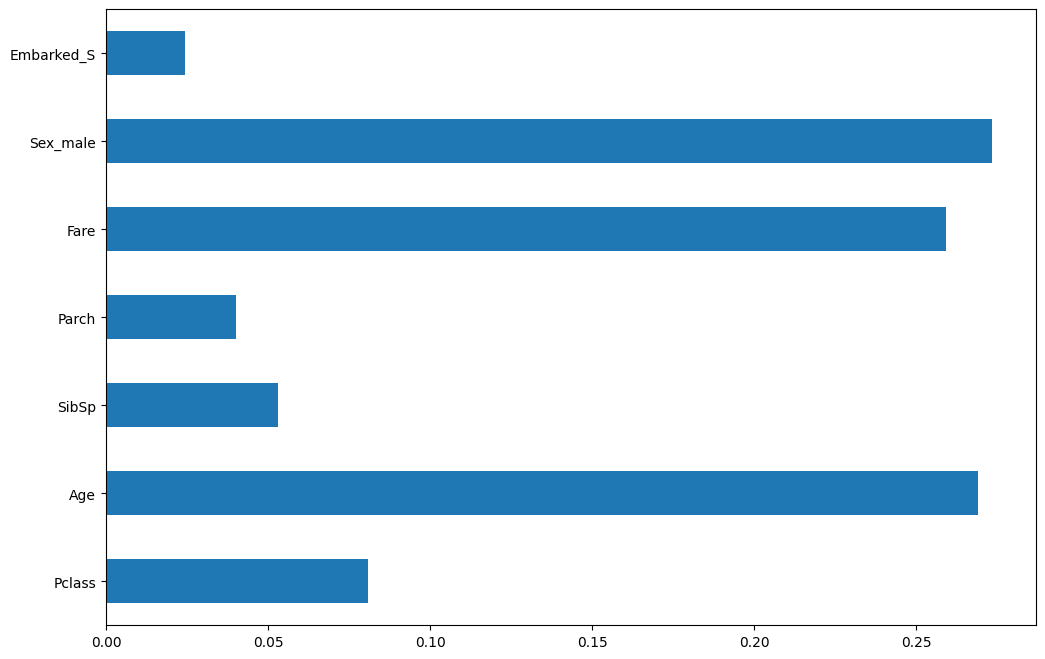

In [53]:
importances = classifier.feature_importances_
df_importances = pd.Series(importances, index = df_X.columns)
indices = np.argsort(importances)[::-1]
features = df_X.columns
features
df_importances.plot(kind='barh', figsize=(12,8))

###Grid search

In [54]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'max_features':['sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.89 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}


###building model with best parameters

In [55]:
best_base_classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = best_base_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[127  12]
 [ 22  62]]


0.8475336322869955

In [56]:
y_pred_test = best_base_classifier.predict(df_test)
y_pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

#Training a svm model

In [57]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 110)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=110)

In [58]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[115  24]
 [ 25  59]]
Accuracy Score:
0.7802690582959642


###test for overfitting

In [59]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[353  57]
 [ 84 174]]


0.7889221556886228

###Grid search

In [60]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C': [0.25, 0.5, 0.75, 1],
    'kernel': ['linear'],
    'gamma': [0,0.1, 0.5, 1, 2, 5]
}

grid_search = GridSearchCV(estimator = classifier,param_grid = parameters,scoring = 'accuracy',cv = 3,n_jobs = -1,verbose = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
best_base_classifier = grid_search.best_estimator_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Accuracy: 78.89 %
Best Parameters: {'C': 0.25, 'gamma': 0, 'kernel': 'linear'}


In [61]:
y_pred = best_base_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[115  24]
 [ 25  59]]
Accuracy Score:
0.7802690582959642


###model bagging


In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

clf = BaggingClassifier(random_state=0)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',verbose =2)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Confusion Matrix:
[[129  10]
 [ 24  60]]
Accuracy Score:
0.8475336322869955


In [63]:
y_pred_test = best_clf.predict(df_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Training naive bayes model

In [64]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[111  28]
 [ 21  63]]


0.7802690582959642

###test for overfitting

In [66]:
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
print(cm)
accuracy_score(y_train, y_train_pred)


[[346  64]
 [ 74 184]]


0.7934131736526946

#Training extra trees model

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)


ExtraTreesClassifier(random_state=0)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[120  19]
 [ 28  56]]


0.7892376681614349

#building an ANN

In [69]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

size_input_layer = X_train.shape[1]
size_hidden_layer = (2*size_input_layer // 3) + 2

model = Sequential([
    Dense(units=size_hidden_layer, input_shape=(size_input_layer,), activation='relu'),

    Dense(units=1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=3,
    epochs=100,
    validation_split = 0.1,
    shuffle=True,
    verbose=2
)

Epoch 1/100
201/201 - 2s - 11ms/step - accuracy: 0.7188 - loss: 0.6169 - val_accuracy: 0.6418 - val_loss: 0.6243
Epoch 2/100
201/201 - 1s - 5ms/step - accuracy: 0.7637 - loss: 0.5772 - val_accuracy: 0.7313 - val_loss: 0.6075
Epoch 3/100
201/201 - 1s - 3ms/step - accuracy: 0.7820 - loss: 0.5483 - val_accuracy: 0.7463 - val_loss: 0.5967
Epoch 4/100
201/201 - 1s - 3ms/step - accuracy: 0.7754 - loss: 0.5265 - val_accuracy: 0.7164 - val_loss: 0.5839
Epoch 5/100
201/201 - 0s - 2ms/step - accuracy: 0.7837 - loss: 0.5089 - val_accuracy: 0.7313 - val_loss: 0.5706
Epoch 6/100
201/201 - 1s - 3ms/step - accuracy: 0.7870 - loss: 0.4962 - val_accuracy: 0.7313 - val_loss: 0.5617
Epoch 7/100
201/201 - 1s - 3ms/step - accuracy: 0.7920 - loss: 0.4866 - val_accuracy: 0.7313 - val_loss: 0.5563
Epoch 8/100
201/201 - 1s - 3ms/step - accuracy: 0.7953 - loss: 0.4779 - val_accuracy: 0.7313 - val_loss: 0.5518
Epoch 9/100
201/201 - 1s - 3ms/step - accuracy: 0.7970 - loss: 0.4720 - val_accuracy: 0.7313 - val_loss

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[121  18]
 [ 27  57]]


0.7982062780269058

In [72]:
y_pred_test = model.predict(df_test)
y_pred_test = (y_pred_test >= 0.5).astype(int)
y_pred_test

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    